<a href="https://colab.research.google.com/github/Legendary-Nerd/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/improved_disease_dataset.csv')
df.head(5)

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [ ]:
df['disease'].unique()

array(['Paralysis (brain hemorrhage)', 'Hypertension', 'Hepatitis B',
       'Impetigo', 'Chronic cholestasis', 'Hepatitis C', 'Typhoid',
       'Dimorphic hemorrhoids(piles)',
       'Vertigo (Benign paroxysmal Positional Vertigo)',
       'Cervical spondylosis', 'Tuberculosis', 'Hyperthyroidism',
       'Malaria', 'Gastroenteritis', 'Osteoarthritis', 'Heart attack',
       'Dengue', 'Pneumonia', 'Urinary tract infection', 'Hypoglycemia',
       'Bronchial Asthma', 'Arthritis', 'Hepatitis D', 'Hypothyroidism',
       'Acne', 'GERD', 'Peptic ulcer disease', 'Psoriasis',
       'Drug Reaction', 'Diabetes', 'Varicose veins', 'Hepatitis A',
       'Hepatitis E', 'Migraine', 'Allergy', 'Jaundice', 'AIDS',
       'Alcoholic hepatitis'], dtype=object)

In [ ]:
df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

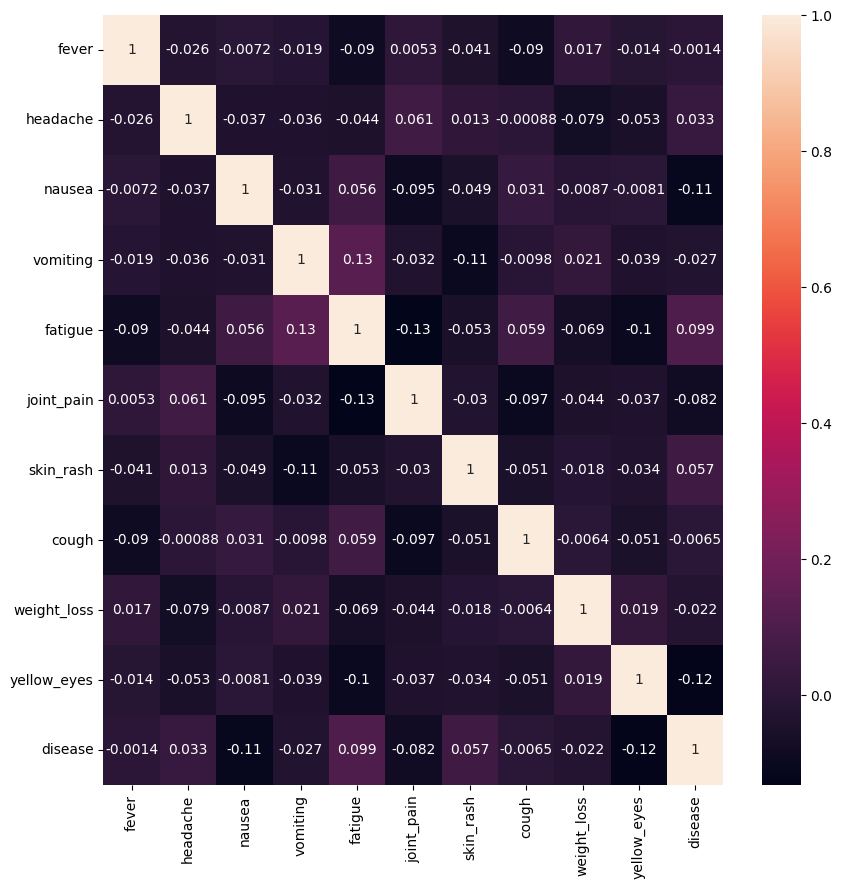

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.shape
# df['disease'].shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['disease'] = le.fit_transform(df['disease'])
df.head(5)

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29


In [ ]:
classes = ['Paralysis (brain hemorrhage)', 'Hypertension', 'Hepatitis B',
       'Impetigo', 'Chronic cholestasis', 'Hepatitis C', 'Typhoid',
       'Dimorphic hemorrhoids(piles)',
       'Vertigo (Benign paroxysmal Positional Vertigo)',
       'Cervical spondylosis', 'Tuberculosis', 'Hyperthyroidism',
       'Malaria', 'Gastroenteritis', 'Osteoarthritis', 'Heart attack',
       'Dengue', 'Pneumonia', 'Urinary tract infection', 'Hypoglycemia',
       'Bronchial Asthma', 'Arthritis', 'Hepatitis D', 'Hypothyroidism',
       'Acne', 'GERD', 'Peptic ulcer disease', 'Psoriasis',
       'Drug Reaction', 'Diabetes', 'Varicose veins', 'Hepatitis A',
       'Hepatitis E', 'Migraine', 'Allergy', 'Jaundice', 'AIDS',
       'Alcoholic hepatitis']

In [ ]:
from sklearn.model_selection import train_test_split
y = df['disease']
X = df.drop('disease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.375


SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.3925
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.33      0.30      0.32        10
           2       0.00      0.00      0.00         1
           3       0.29      0.22      0.25         9
           4       0.00      0.00      0.00         9
           5       0.12      0.14      0.13         7
           6       0.15      0.25      0.19         8
           7       0.47      0.53      0.50        17
           8       0.11      0.33      0.16         6
           9       0.57      0.36      0.44        11
          10       0.61      0.65      0.63        17
          11       0.62      0.62      0.62         8
          12       0.43      0.30      0.35        10
          13       0.29      0.44      0.35         9
          14       0.60      0.43      0.50        14
          15       0.20      0.11      0.14         9
          16       0.42      0.59      0.49        17
          17       0